In [1]:
import numpy as np
import scipy.linalg as spl

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from macmodes import Param, set_y, set_A, CMchi
from time_tools import sectoyear

In [2]:
###### REALISTIC DIMENSIONAL PARAMETERS #######
param = Param(3,                   # angular order
              140e3,               # Stratified layer thickness
              0.5 * 2*np.pi/86400, # Buoyancy frequency = 0.5*Omega
              0.5e-3               # Background radial magnetic field in T
             )

**The purpose of this notebook is to plot the gravest high-latitude and equatorial MAC wave eigenmodes (for angular orders m=3 and m=6, respectively) on a spherical grid.
See Nicolas & Buffett (2023) for more details**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


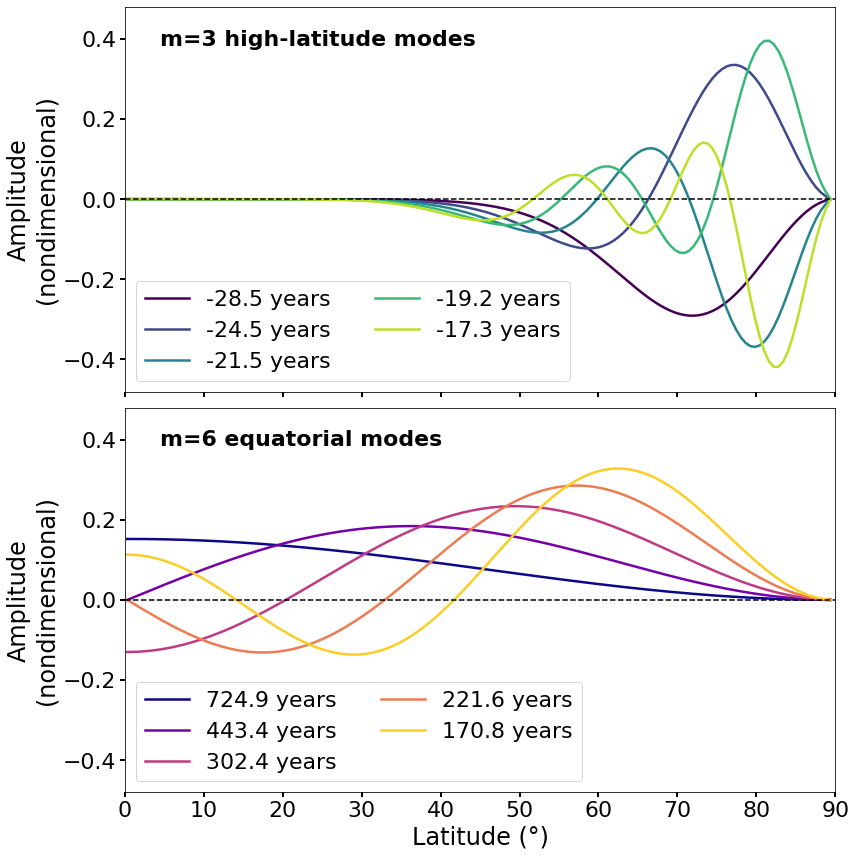

In [3]:
# Plotting the first few high-lat and equatorial eigenmodes
def plot_eigenmodes(ax,n1,n2,westward_traveling=True,m=3,colors=1,loc=2):
    ngrid=150

    k = np.pi/param.H
    period0=(-20)*sectoyear
    omega = 2*np.pi / period0
    
    C0 = 2*param.Omega*k**2*param.R**2/(param.N**2)
    C = C0*omega
    _,M,chi = CMchi(param,period0,1)
    
    # Compute matrix and eigendecomposition, with dirichlet BC
    y=set_y(ngrid)
    A = set_A(ngrid,param.m,M,BC="Dirichlet")
    wi,xi=spl.eig(A)
    if not westward_traveling: # Add Neumann BC solutions as well
        A = set_A(ngrid,param.m,M,BC="Neumann")
        wi_n,xi_n=spl.eig(A)
        wi=np.concatenate([wi,wi_n])
        xi=np.concatenate([xi,xi_n],axis=1)
    #Merge all eigenvalues and eigenvectors; and sort them by increasing period
    if westward_traveling:
        order=np.argsort(np.real(1/wi))
    else:
        order=np.argsort(-np.real(1/wi))
        xi*=np.sign(xi[len(y)-10])
        
    xi=xi[:len(y),order]/(1-y[:,None]**2) #Convert from the modified magnetic perturbation to its physical form
    wi=wi[order]
    
    lns='-'
    lw=2.5
    if colors==1:
        clrs=plt.cm.viridis(np.linspace(0,0.9,n2-n1))
    elif colors==2:
        clrs=plt.cm.plasma(np.linspace(0,0.9,n2-n1))
    
    for i in range(n1,n2):
        eigenmode_period = np.real(2*np.pi*C0/(wi[i]*sectoyear))
        ax.plot(np.arcsin(y)*180.0/np.pi,np.real(xi[:,i]),label="%.1f years"%eigenmode_period,linestyle=lns,linewidth=lw,color=clrs[i-n1])

    ax.set_xlim(0,90)
    ax.legend(loc=loc,ncol=2)#,fontsize=20,borderpad=0.3,labelspacing=0.4,borderaxespad=0.3)
    ax.set_ylim(-0.48,0.48)
    ax.set_ylabel("Amplitude\n(nondimensional)",fontsize=24)
    ax.axhline(0.,linestyle='--',color='k')
    ax.tick_params(width=2,length=5)
    


matplotlib.rcParams.update({'font.size':22})
fig,(ax,ax2)=plt.subplots(2,1,figsize=(12,12))
plot_eigenmodes(ax ,0,5,westward_traveling=True ,m=3,colors=1,loc=3)
plot_eigenmodes(ax2,0,5,westward_traveling=False,m=6,colors=2,loc=3)
ax2.set_xlabel("Latitude (°)",fontsize=24)
ax.set_xticks(range(0,100,10))
ax.set_xticklabels([""]*10)
xt=0.05;yt=0.9
ax.text( xt,yt, 'm=3 high-latitude modes',fontweight='bold', transform=ax.transAxes)
ax2.text(xt,yt, 'm=6 equatorial modes'   ,fontweight='bold', transform=ax2.transAxes)
fig.tight_layout(pad=0.5)
fig.savefig('figures/modes.eps', format='eps',bbox_inches='tight')